In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("team-vs-individual-multiTimeline.csv")

In [7]:
df

,Month,womens gymnastics: (United States),Individual all-around: (United States),gymnastics: (United States),gymnastics team: (United States),team final: (United States)
0,2004-01,<1,0,12,<1,<1
1,2004-02,<1,0,11,<1,<1
2,2004-03,<1,0,10,<1,<1
3,2004-04,<1,0,9,<1,0
4,2004-05,<1,0,9,<1,<1
...,...,...,...,...,...,...
232,2023-05,<1,<1,8,<1,<1
233,2023-06,<1,0,9,<1,<1
234,2023-07,<1,0,9,<1,<1
235,2023-08,<1,0,14,<1,<1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Month                                   237 non-null    object
 1   womens gymnastics: (United States)      237 non-null    object
 2   Individual all-around: (United States)  237 non-null    object
 3   gymnastics: (United States)             237 non-null    int64 
 4   gymnastics team: (United States)        237 non-null    object
 5   team final: (United States)             237 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.2+ KB


In [12]:
# Function to replace '<1' with 0 and convert to float
def replace_and_convert(x):
    if isinstance(x, str):
        if x.startswith('<'):
            return 0.0
        else:
            return float(x)
    else:
        return x

# Convert object columns (excluding 'Month') with values less than 1 to integers
obj_columns = df.select_dtypes(include=['object']).columns
obj_columns = obj_columns[obj_columns != 'Month']  # Exclude 'Month' column

for col in obj_columns:
    df[col] = df[col].apply(replace_and_convert).astype(int)


       Month  womens gymnastics: (United States)  \
0    2004-01                                   0   
1    2004-02                                   0   
2    2004-03                                   0   
3    2004-04                                   0   
4    2004-05                                   0   
..       ...                                 ...   
232  2023-05                                   0   
233  2023-06                                   0   
234  2023-07                                   0   
235  2023-08                                   0   
236  2023-09                                   0   

     Individual all-around: (United States)  gymnastics: (United States)  \
0                                         0                           12   
1                                         0                           11   
2                                         0                           10   
3                                         0                            

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Month                                   237 non-null    object
 1   womens gymnastics: (United States)      237 non-null    int64 
 2   Individual all-around: (United States)  237 non-null    int64 
 3   gymnastics: (United States)             237 non-null    int64 
 4   gymnastics team: (United States)        237 non-null    int64 
 5   team final: (United States)             237 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 11.2+ KB


In [16]:
df["Month"]

0      2004-01
1      2004-02
2      2004-03
3      2004-04
4      2004-05
        ...   
232    2023-05
233    2023-06
234    2023-07
235    2023-08
236    2023-09
Name: Month, Length: 237, dtype: object

In [17]:
# Split 'Month' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Month'].str.split('-', expand=True)

# Convert 'Year' and 'Month' columns to integers if needed
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)


In [18]:
df

,Month,womens gymnastics: (United States),Individual all-around: (United States),gymnastics: (United States),gymnastics team: (United States),team final: (United States),Year
0,1,0,0,12,0,0,2004
1,2,0,0,11,0,0,2004
2,3,0,0,10,0,0,2004
3,4,0,0,9,0,0,2004
4,5,0,0,9,0,0,2004
...,...,...,...,...,...,...,...
232,5,0,0,8,0,0,2023
233,6,0,0,9,0,0,2023
234,7,0,0,9,0,0,2023
235,8,0,0,14,0,0,2023


In [19]:
df.columns

Index(['Month', 'womens gymnastics: (United States)',
       'Individual all-around: (United States)', 'gymnastics: (United States)',
       'gymnastics team: (United States)', 'team final: (United States)',
       'Year'],
      dtype='object')

In [20]:
desired_columns = ['Year', 'Month', 'womens gymnastics: (United States)',
       'Individual all-around: (United States)', 'gymnastics: (United States)',
       'gymnastics team: (United States)', 'team final: (United States)' ]

# Create a new DataFrame with the specified column order
df_reordered = df[desired_columns]

In [21]:
df_reordered

,Year,Month,womens gymnastics: (United States),Individual all-around: (United States),gymnastics: (United States),gymnastics team: (United States),team final: (United States)
0,2004,1,0,0,12,0,0
1,2004,2,0,0,11,0,0
2,2004,3,0,0,10,0,0
3,2004,4,0,0,9,0,0
4,2004,5,0,0,9,0,0
...,...,...,...,...,...,...,...
232,2023,5,0,0,8,0,0
233,2023,6,0,0,9,0,0
234,2023,7,0,0,9,0,0
235,2023,8,0,0,14,0,0


In [25]:
df = df_reordered

In [28]:
# Convert 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Year                                    237 non-null    int64         
 1   Month                                   237 non-null    datetime64[ns]
 2   womens gymnastics: (United States)      237 non-null    int64         
 3   Individual all-around: (United States)  237 non-null    int64         
 4   gymnastics: (United States)             237 non-null    int64         
 5   gymnastics team: (United States)        237 non-null    int64         
 6   team final: (United States)             237 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 13.1 KB


In [33]:
import matplotlib.pyplot as plt

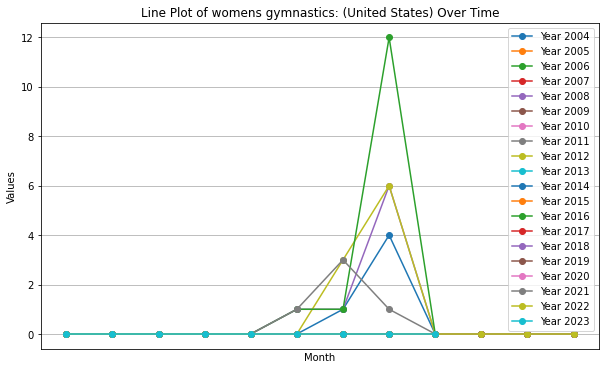

In [37]:
# Convert 'Month' column to a NumPy array
x = np.array(df['Month'])
y = np.array(df['womens gymnastics: (United States)'])

# Get unique years in the DataFrame
unique_years = df['Year'].unique()

# Create a line plot with different colors for each year
plt.figure(figsize=(10, 6))
for year in unique_years:
    mask = df['Year'] == year
    plt.plot(x[mask], y[mask], label=f'Year {year}', marker='o')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Line Plot of womens gymnastics: (United States) Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


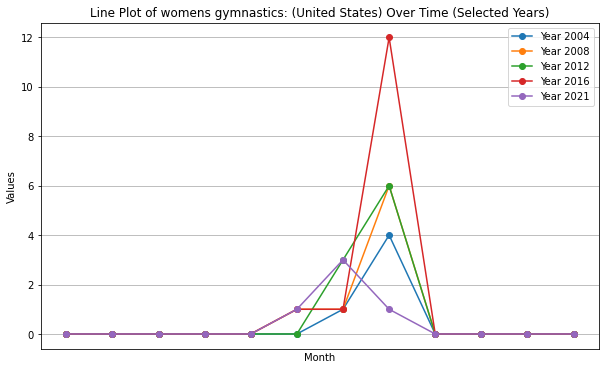

In [39]:
# Filter the DataFrame to include only specific years
years_to_plot = [2004, 2008, 2012, 2016, 2021]
filtered_df = df[df['Year'].isin(years_to_plot)]

# Create a line plot with different colors for each year
plt.figure(figsize=(10, 6))
for year in years_to_plot:
    mask = filtered_df['Year'] == year
    x = filtered_df.loc[mask, 'Month'].values  # Convert to NumPy array
    y = filtered_df.loc[mask, 'womens gymnastics: (United States)'].values  # Convert to NumPy array
    plt.plot(x, y, label=f'Year {year}', marker='o')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Line Plot of womens gymnastics: (United States) Over Time (Selected Years)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Compare above to:
1. total medals won
2. total individual medals won
3. womens team results
4. womens individual results

In [61]:
women = pd.read_csv('../../kaggle-data/womam_big.csv')

In [64]:
yers = women[women["Year"] > 2002]

In [65]:
yers["Year"].value_counts()

Year
2004    507
2008    435
2016    383
2012    382
Name: count, dtype: int64

In [45]:
start_year = 2004
end_year = 2021

filtered_years_df = women[(women['Year'] >= start_year) & (women['Year'] <= end_year)]



In [47]:
df = filtered_years_df.copy()

In [51]:
df = df[df["NOC"] == 'USA']

In [56]:
df1 = df.dropna(subset=['Medal'])


In [58]:
df1["Year"].value_counts()

Year
2016    13
2008    13
2004    11
2012     9
Name: count, dtype: int64

In [59]:
data = {'Year': [2016, 2008, 2004, 2012],
        'num_medals': [13, 13, 11, 9]}

medals = pd.DataFrame(data)

In [60]:
medals

,Year,num_medals
0,2016,13
1,2008,13
2,2004,11
3,2012,9


## Need mens data as well